In [1]:
from aad import B1530Lib
import matplotlib.pyplot as plt

#help(B1530Lib)

def plot_result(data):
    plt.figure(figsize=(6,6))
    ax1=plt.subplot(311)
    ax2=plt.subplot(312,sharex=ax1)
    ax3=plt.subplot(313,sharex=ax1)

    ax1.set_title('V = '+str(2.5))
    ax1.plot(data.tpsVA*1e6,data.VA)
    ax1.set_ylabel('Voltage (V)')
    ax1.set_xlabel('Time ($\mu s$)')
    ax1.grid()

    ax2.plot(data.tpsIB*1e6,abs(data.IB)*1e3)
    ax2.set_ylabel('Current (mA)')
    ax2.set_xlabel('Time ($\mu s$)')
    ax2.grid()

    #established_idx = abs(data.VA - 2.5) < 0.01

    ax3.plot(data.tpsVA[1:-1]*1e6, abs(data.VA[1:-1] / data.IB[1:-1]), 'bo')
    ax3.set_ylabel('Resistance ($\Omega$)')
    ax3.set_xlabel('Time ($\mu s$)')
    ax3.set_ylim(910, 1010)
    ax3.grid()

    plt.tight_layout()
    

In [2]:
B1530Lib.print_devices()
b = B1530Lib.B1530()

ASRL3::INSTR
ASRL4::INSTR
GPIB0::INTFC
GPIB0::18::INSTR


In [3]:
av_t        = 1e-5
sample_rate = av_t

b.chan[2].name = 'VA'
b.chan[2].wave = B1530Lib.Pulse(voltage=2.5, interval=10e-5, edges=1e-7, length=10e-5)
b.chan[2].meas = b.chan[2].wave.measure(mode='voltage', range='5V', average_time=av_t, sample_rate=sample_rate)


b.chan[1].name = 'IB'
b.chan[1].meas = b.chan[2].wave.measure(mode='current', range='10mA', average_time=av_t, sample_rate=sample_rate)

b.configure(repeat=2)

In [4]:
b.exec()

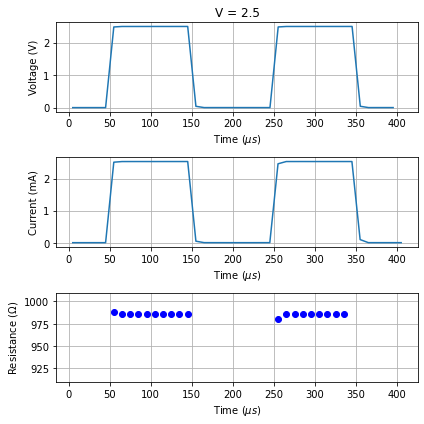

In [5]:
data = b.result
plot_result(data)
  

A resistor of 1 kΩ is measured: OK

In [6]:
av_t        = 1e-5
sample_rate = av_t

step_length = 1e-4
step_jump   = 1e-5
pattern = []
for i in range(10):
    pattern.extend([[step_jump, i * 0.5], [step_length, i * 0.5]])
pattern.append([step_jump, 0])

b.reset_configuration()

b.chan[2].wave = B1530Lib.Waveform(pattern)
b.chan[2].meas = b.chan[2].wave.measure(mode='voltage', range='5V', average_time=av_t, sample_rate=sample_rate)
b.chan[1].meas = b.chan[2].wave.measure(mode='current', range='10mA', average_time=av_t, sample_rate=sample_rate)

b.configure()

In [7]:
b.exec()

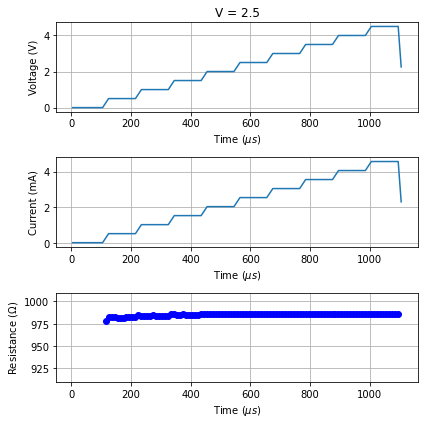

In [8]:
plot_result(b.result)